<a href="https://colab.research.google.com/github/MennatullahOsman/Denoising_Dirty_Documents/blob/main/Model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import os

In [ ]:
os.chdir('/content/drive/My Drive/denoising-dirty-documents/pickle_data')

pickle_out = open("x_train_aug.pickle", "rb")
x_train_aug = pickle.load(pickle_out)
pickle_out.close()

pickle_out = open("y_train_aug.pickle", "rb") 
y_train_aug = pickle.load(pickle_out)
pickle_out.close()

pickle_out = open("x_val.pickle", "rb")
x_val = pickle.load(pickle_out)
pickle_out.close()

pickle_out = open("y_val.pickle", "rb")
y_val = pickle.load(pickle_out)
pickle_out.close()

pickle_out = open("test.pickle", "rb")
test = pickle.load(pickle_out)
pickle_out.close()

In [ ]:
tf.keras.backend.clear_session()

input_layer = tf.keras.Input(shape=(420, 540, 1))

#Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer) 
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) 
x = MaxPooling2D((2, 2), padding='same')(x)

#Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) 
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) 
x = UpSampling2D((2, 2))(x)

output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

AutoEncoder = tf.keras.Model(input_layer, output_layer)

AutoEncoder.compile(optimizer='adam', loss='mse', metrics ='accuracy')

AutoEncoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 420, 540, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 210, 270, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 210, 270, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 105, 135, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 105, 135, 32)      9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 210, 270, 32)     

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)
Model_3 = AutoEncoder.fit(x_train_aug , y_train_aug ,epochs= 100, batch_size=30,validation_data=(x_val,y_val),  callbacks=[earlystop])  

Epoch 1/100
54/54 [==============================] - 16s 291ms/step - loss: 0.0669 - accuracy: 0.5305 - val_loss: 0.0574 - val_accuracy: 0.6318
Epoch 2/100
54/54 [==============================] - 15s 274ms/step - loss: 0.0314 - accuracy: 0.5511 - val_loss: 0.0410 - val_accuracy: 0.6436
Epoch 3/100
54/54 [==============================] - 15s 277ms/step - loss: 0.0230 - accuracy: 0.5529 - val_loss: 0.0335 - val_accuracy: 0.6487
Epoch 4/100
54/54 [==============================] - 15s 276ms/step - loss: 0.0187 - accuracy: 0.5542 - val_loss: 0.0293 - val_accuracy: 0.6522
Epoch 5/100
54/54 [==============================] - 15s 279ms/step - loss: 0.0157 - accuracy: 0.5549 - val_loss: 0.0255 - val_accuracy: 0.6539
Epoch 6/100
54/54 [==============================] - 15s 280ms/step - loss: 0.0139 - accuracy: 0.5553 - val_loss: 0.0228 - val_accuracy: 0.6557
Epoch 7/100
54/54 [==============================] - 15s 283ms/step - loss: 0.0124 - accuracy: 0.5556 - val_loss: 0.0210 - val_accuracy:

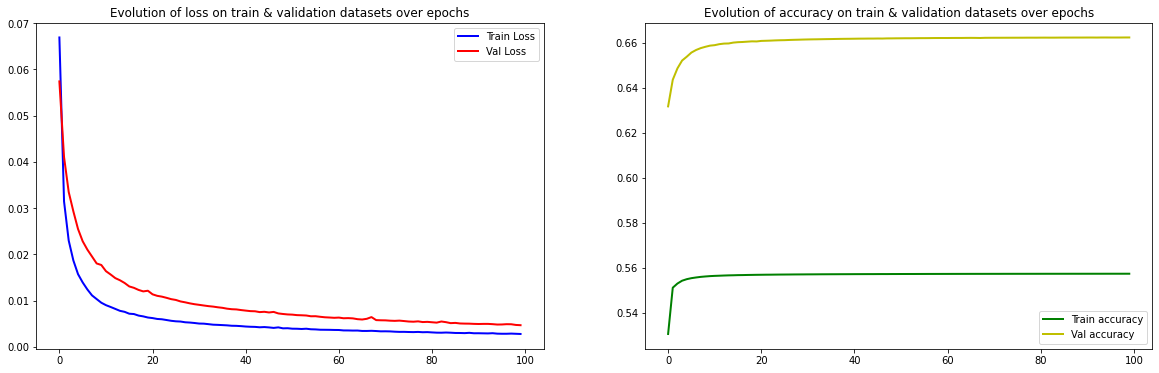

In [ ]:
# Check how loss & mae went down
epoch_loss = Model_3.history['loss']
epoch_val_loss = Model_3.history['val_loss']
epoch_accuracy = Model_3.history['accuracy']
epoch_val_accuracy = Model_3.history['val_accuracy']

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(range(0,len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Train Loss')
plt.plot(range(0,len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Val Loss')
plt.title('Evolution of loss on train & validation datasets over epochs')
plt.legend(loc='best')
plt.subplot(1,2,2)
plt.plot(range(0,len(epoch_accuracy)), epoch_accuracy, 'g-', linewidth=2, label='Train accuracy')
plt.plot(range(0,len(epoch_val_accuracy)), epoch_val_accuracy, 'y-', linewidth=2, label='Val accuracy')
plt.title('Evolution of accuracy on train & validation datasets over epochs')
plt.legend(loc='best')


plt.show()

In [ ]:
output_test = AutoEncoder.predict(test, batch_size=16)

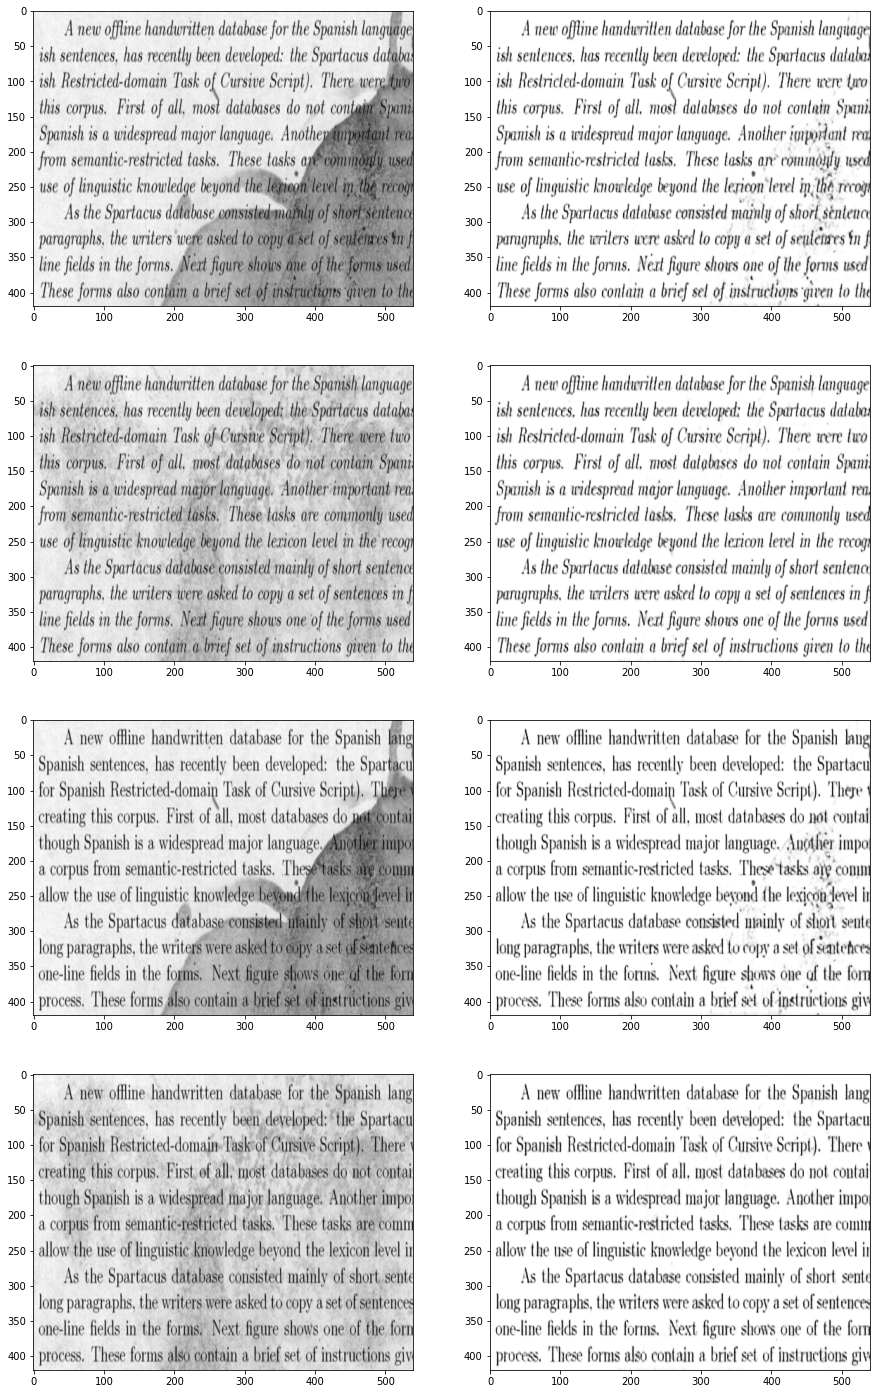

In [ ]:
plt.figure(figsize=(15,25))
for i in range(0,8,2):
    plt.subplot(4,2,i+1)
    plt.imshow(test[i][:,:,0], cmap='gray')
    
    plt.subplot(4,2,i+2)
    plt.imshow(output_test[i][:,:,0], cmap='gray')

plt.show()